# Basic Experiment

Within the basic experiment, we want to check if homographies are useable in real world conditions, where the planar assumption fails. We furthermore, want to examine how point compositions influence our results. 

## Functions we might need

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import scienceplots
import pandas as pd
from itertools import combinations
import pprint
plt.style.use(['science', 'grid'])

from utils import (
    load_dataset,
    get_images,
    transform_points,
    get_densities,
    predict,
    calculate_errors,
    get_result_dict,
    SCALING_FACTOR,
    plot_setup, 
    plot_predictions
)

## Homographies within the Real World

todo

## Point Compositions

In the basic experiment we want to answer the following two questions. Note that the questions about measurement noise and outliers will be answered in other experiments.
1. How many points?
2. How to spread points?

### How Many Points?

### How to spread points?

Let's examine the case for four reference points, as they are the minimum required. We have determined the following possible influencing factors:
1. Collinearity
2. Distance to next reference point
3. Pixel Density
4. Spanned Area
5. (Rectangle Measure)

#### Collinearity

We need at least four points to determine a homography $\mathrm{H}$. It collapses when at least three points are collinear. In the real world, points are rarely collinear. However, we can quantify collinearity with the following measurement:

Given three points A, B, C and their corresponding edges a, b, c, let's calculate the following measure
$$
\text{collinearity} = (a + b - c) / c,
$$
where $c$ is the longest distance. Hence, given four reference points, we can determine $\begin{pmatrix} 4 \\ 3 \end{pmatrix} = 4$ collinearity scores. To quantify the collinearity score for the whole four reference point setup, we will take the smallest collinearity score. Note that this only works for four reference points. With more reference points, we might need to adjust it, as the homography has more chance to overcome the collinearity. INSERT MATH HERE FOR REFERENCE POINT SETUP.

In [57]:
def get_collinearity_score(subset, reference_pts_pv):
    A = np.array(reference_pts_pv[subset[0]])
    B = np.array(reference_pts_pv[subset[1]])
    C = np.array(reference_pts_pv[subset[2]])
    AB = np.linalg.norm(A-B) 
    AC = np.linalg.norm(A-C) 
    BC = np.linalg.norm(B-C)
    distances = sorted([AB, AC, BC])
    return (distances[0] + distances[1] - distances[2]) / distances[2] * 100

get_collinearity_score(['w4', 'w5', 'w7'], reference_pts_pv)

0.026612262806635926

Let's test our collinearity score in our real world setup and use the image DJI_0026 for closer investigation and plot the collinearity scores:

In [111]:
# Plot Functions

# TODO THOSE PLOT FUNCTIONS ARE NOT YET FINISHED!!!! UNCLEAN AF.
def plot_reference_point(name, reference_pts_pv, ax, fc, ec):
    pt = reference_pts_pv[name]
    ax.annotate(name, 
        xy=(pt[0]+x_offset, pt[1]+y_offset),
        color='black',
        bbox=dict(facecolor=fc, edgecolor=ec, boxstyle="round", alpha=0.8)
    )

def plot_collinearity_score(R1, R2, R3, reference_pts_pv, ax, fc, ec):
    score = get_collinearity_score([R1, R2, R3], reference_pts_pv)
    A = reference_pts_pv[R1]
    B = reference_pts_pv[R2]
    C = reference_pts_pv[R3] 

    # Plot lines
    ax.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], lw=3, linestyle='--', color=ec)
    # Plot Score
    ax.annotate(f'{score:.2f}', 
        xy=(B[0]+50, B[1]-100),
        color=ec,
        bbox=dict(facecolor='white', edgecolor=ec, boxstyle="round", alpha=0.8)
    )
    # Plot Reference points
    for name in [R1, R2, R3]:
        plot_reference_point(name, reference_pts_pv, ax, fc, ec)

def plot_reference_points(reference_pts_pv, ax, x_offset=-50, y_offset=0):
    for name, pt in reference_pts_pv.items():
        ax.plot(pt[0], pt[1], marker='X', markersize=8, color='whitesmoke')
        ax.annotate(name, 
            xy=(pt[0]+x_offset, pt[1]+y_offset),
            bbox=dict(facecolor='whitesmoke', edgecolor='white', boxstyle="round", alpha=0.8)
        )

# Necessary Variables
pv_img_fname = 'DJI_0026'
tv_img_fname = 'DJI_0017'

pv_img, tv_img = get_images(pv_img_fname, tv_img_fname)
reference_pts_pv, reference_pts_tv, validation_pts_pv, validation_pts_tv = load_dataset(pv_img_fname, tv_img_fname)

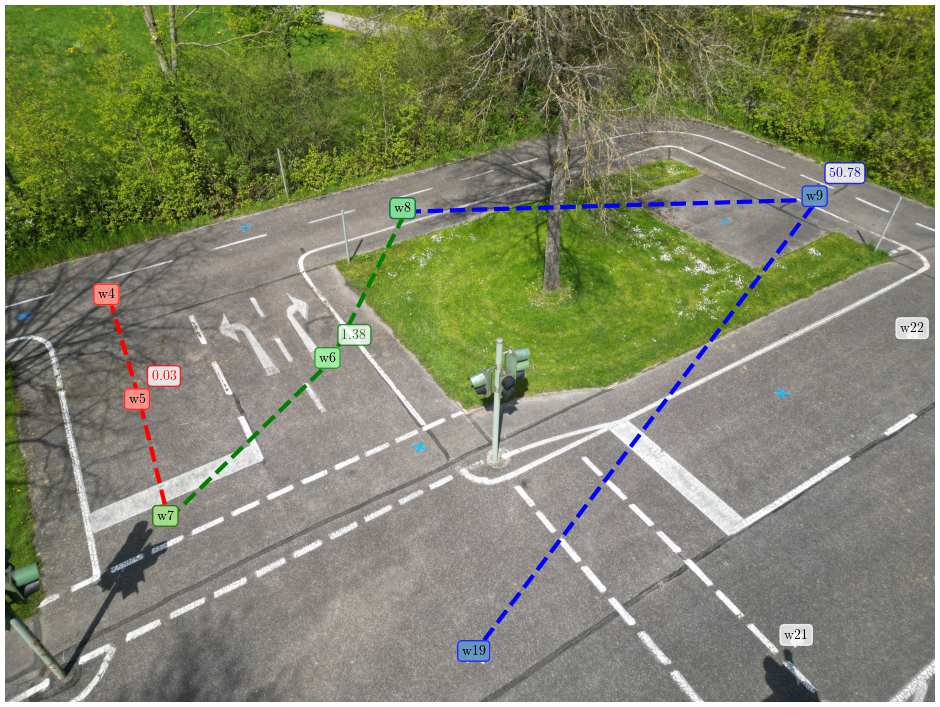

In [112]:
# Plot individual collinearity scores
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.imshow(pv_img)
ax.axis('off')

plot_reference_points(reference_pts_pv, ax)
plot_collinearity_score('w8', 'w9', 'w19', reference_pts_pv, ax, 'steelblue', 'blue')
plot_collinearity_score('w4', 'w5', 'w7', reference_pts_pv, ax, 'salmon', 'red')
plot_collinearity_score('w7', 'w6', 'w8', reference_pts_pv, ax, 'lightgreen', 'green')

plt.show()

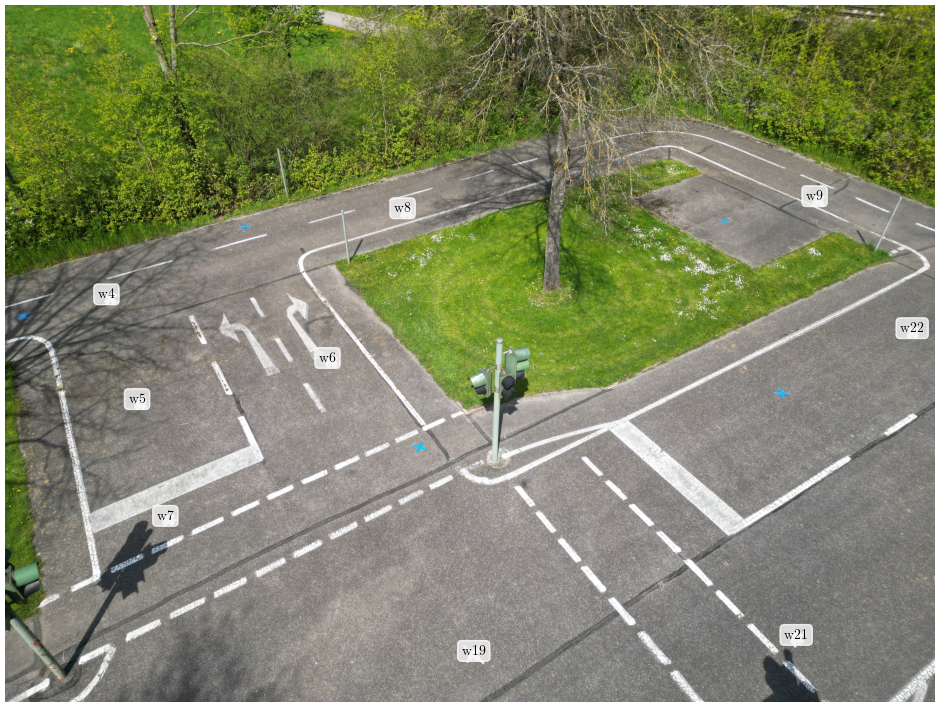

In [113]:
# Plot Combined Collinarity score
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.imshow(pv_img)
ax.axis('off')

def plot_used_reference_points(ref_pts):
    pass

plot_reference_points(reference_pts_pv, ax)
plot_used_reference_points(['w4', 'w5', 'w6', 'w8'])

plt.show()